# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

boston = pd.read_csv('BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

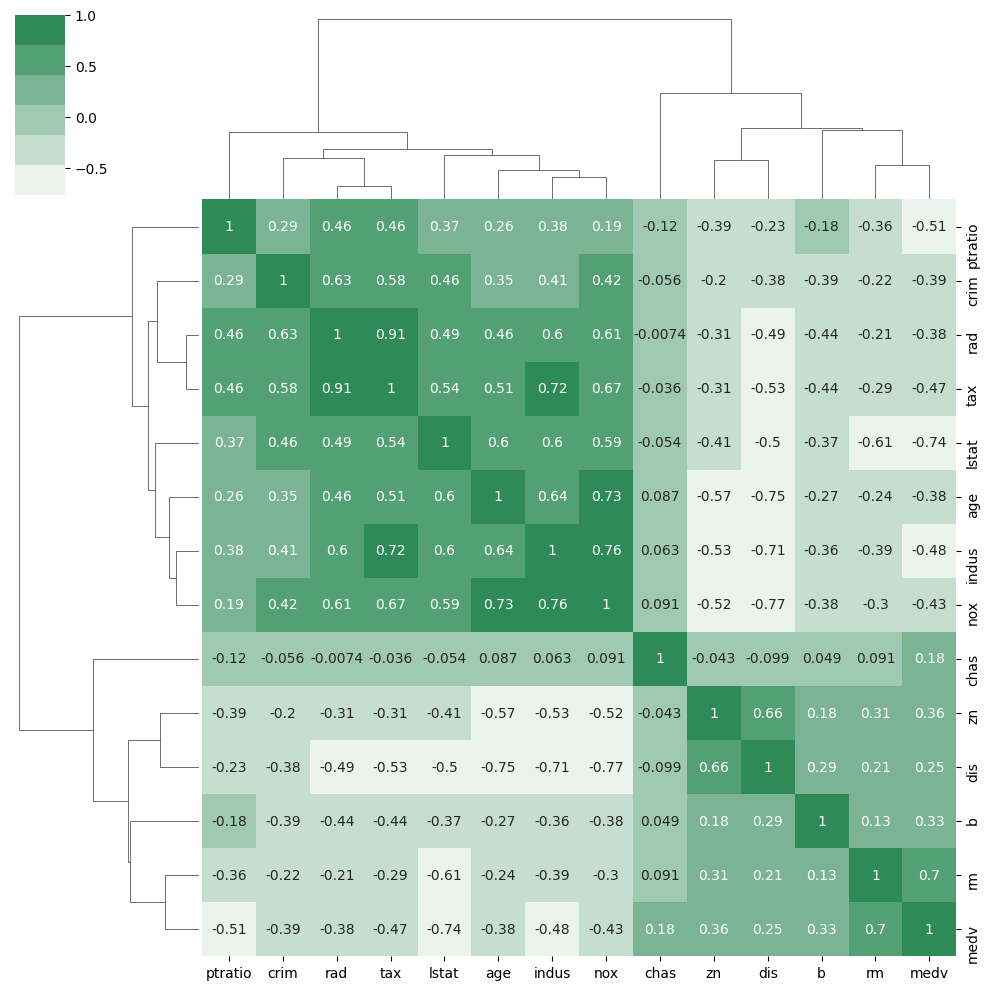

In [5]:
corr = boston.corr()
sns.clustermap(corr, figsize=(10, 10), annot=True, cmap=sns.light_palette("seagreen"))

> Podemos verificar na tabela de correlação acima que o **número médio de quartos por habitação (rm)** possui uma correlação de 0.7 com o valor mediano das casas ocupadas (medv)

<AxesSubplot: xlabel='Número médio de quartos por habitação', ylabel='Valor mediano das casas ocupadas'>

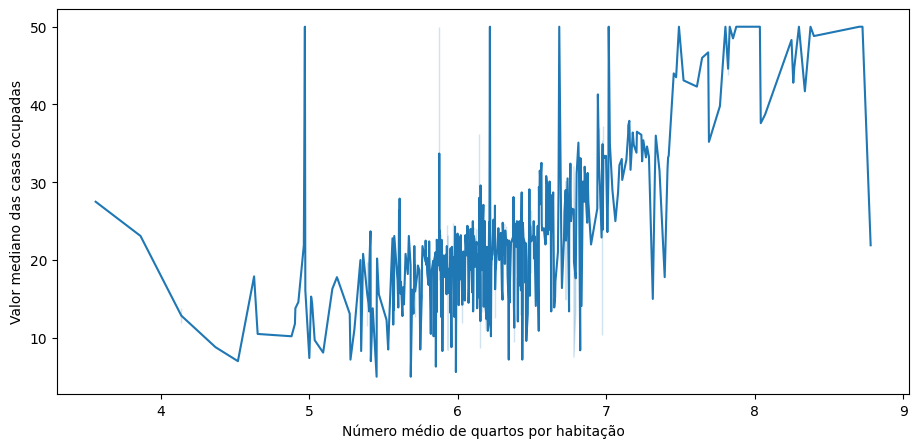

In [6]:
_, ax = pyplot.subplots(figsize=(11, 5))
ax.set_xlabel('Número médio de quartos por habitação')
ax.set_ylabel('Valor mediano das casas ocupadas')
sns.lineplot(data=boston, ax=ax, x='rm', y='medv')

> Podemos verificar no gráfico acima que o valor aumenta em relação ao número de quartos da habitação. Podemos verificar também a presença de alguns outliers nos dados da variável 'medv'

<AxesSubplot: >

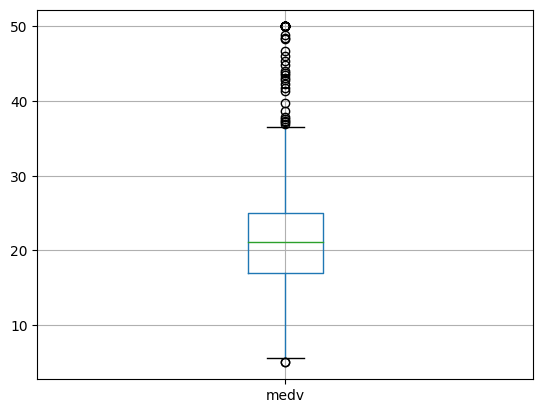

In [7]:
boston[['medv']].boxplot()

In [8]:
quantile = boston['medv'].quantile([0.25, 0.5, 0.75])
Q1 = quantile[0.25]
Q3 = quantile[0.75]
I = Q3 - Q1
qmin = Q1 - (1.5 * I)
qmax = Q3 + (1.5 * I)

<AxesSubplot: xlabel='Número médio de quartos por habitação', ylabel='Valor mediano das casas ocupadas'>

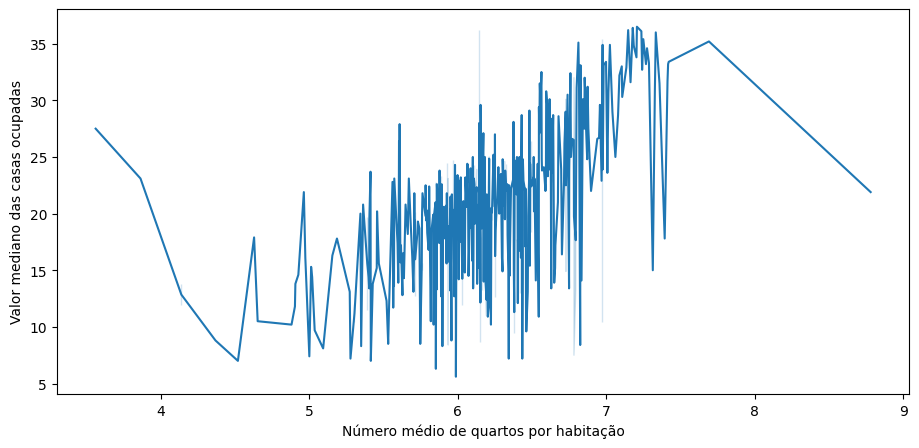

In [9]:
bostoncp = boston.copy()
bostoncp = bostoncp[(bostoncp['medv'] >= qmin) & (bostoncp['medv'] <= qmax)]

_, ax = pyplot.subplots(figsize=(11, 5))
ax.set_xlabel('Número médio de quartos por habitação')
ax.set_ylabel('Valor mediano das casas ocupadas')
sns.lineplot(data=bostoncp, ax=ax, x='rm', y='medv')

> No gráfico acima, removendo os outliers podemos confirmar que existe uma tendência de alta no valor em relação ao número de quartos, principalmente na faixa de 5 até 8 quartos.

### 3. Separe os dados em validação e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [11]:
tree1 = DecisionTreeRegressor(max_depth=8, random_state=0)
tree2 = DecisionTreeRegressor(max_depth=2, random_state=0)

tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [12]:
predictions_tree1_train = tree1.predict(X_train)
predictions_tree2_train = tree2.predict(X_train)

mse1 = mean_squared_error(y_train, predictions_tree1_train)
mse2 = mean_squared_error(y_train, predictions_tree2_train)

print(f"MSE da árvore profundidade 8 na base de treinamento: {mse1:.3f}")
print(f"MSE da árvore profundidade 2 na base de treinamento: {mse2:.3f}")

MSE da árvore profundidade 8 na base de treinamento: 1.383
MSE da árvore profundidade 2 na base de treinamento: 23.698


In [13]:
predictions_tree1_test = tree1.predict(X_test)
predictions_tree2_test = tree2.predict(X_test)

mse1 = mean_squared_error(y_test, predictions_tree1_test)
mse2 = mean_squared_error(y_test, predictions_tree2_test)

print(f"MSE da árvore profundidade 8 na base de teste: {mse1:.3f}")
print(f"MSE da árvore profundidade 2 na base de teste: {mse2:.3f}")

MSE da árvore profundidade 8 na base de teste: 26.485
MSE da árvore profundidade 2 na base de teste: 31.425


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

> A árvore que parece mais adequada é a árvore com profundidade 8 pois apresenta o menor MSE na base de teste, 26.485

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

> A variável que parece ser mais importe é a **rm - número médio de quartos por habitação (rm)**

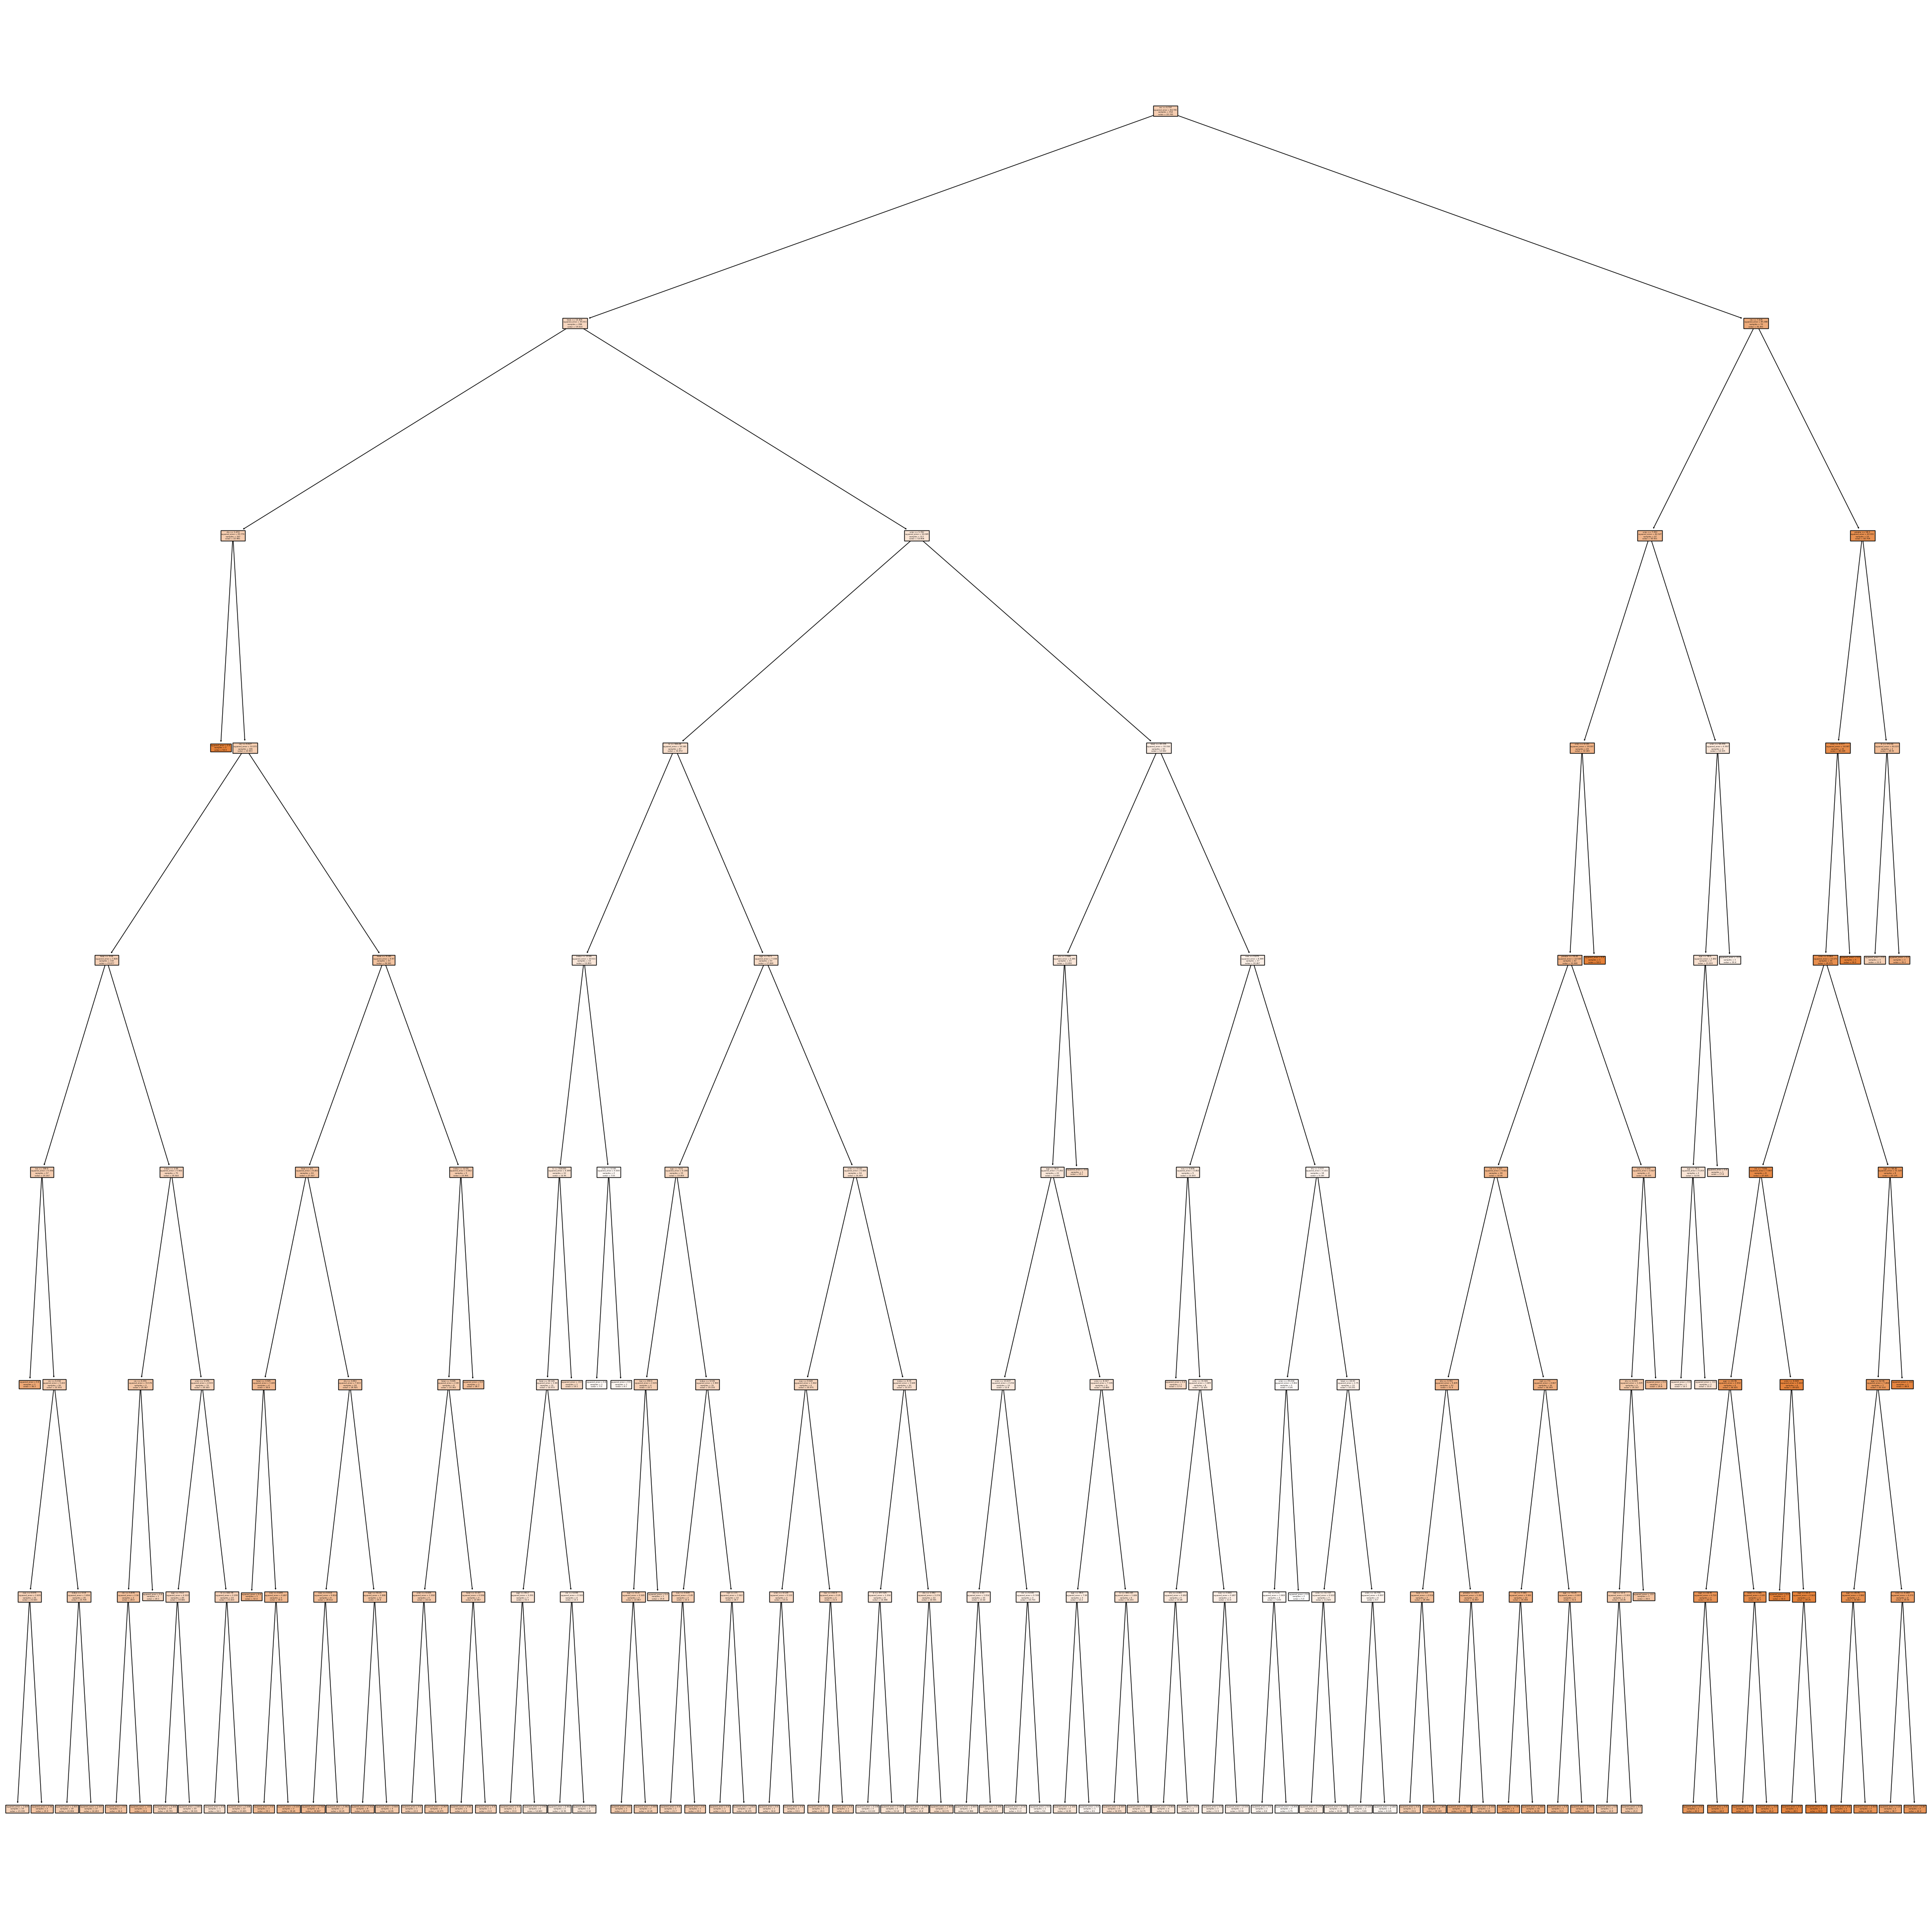

In [14]:
pyplot.rc('figure', figsize=(50, 50))
_ = tree.plot_tree(tree1, feature_names=X.columns, filled=True)